In [244]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [245]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.ioff()

## Reading Data from CSV File

In [246]:
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Understanding the Dataset

In [247]:
#Inspecting datatypes & non-null objects in each column
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null ob

In [248]:
# Shape of the dataframe
df.shape

(39717, 111)

## Cleaning the dataset

We will carry out the dataset cleaning by following the below steps:
- Checking for null value columns/rows and imputing/removing those null values
- Removing columns not significant to our analysis

In [249]:
# Finding the percentage of null values in each column
round(100*(df.isnull().sum()/len(df.index)), 2) 

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [250]:
# We can identify a lot of columns which have 100% null values. So, let's remove those columns from the dataframe
df.dropna(axis=1, how='all',inplace=True)

In [251]:
# Identifying the shape of the dataframe
df.shape

(39717, 57)

In [252]:
# Identifying percentage null values in the columns
round(100*(df.isnull().sum()/len(df.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [253]:
# We have got columns with null values. Also, there are a lot of columns which are not significant to our analysis.
# Let's start by removing attributes(columns) which are insignificant with respect to our analysis.
df.drop(['pymnt_plan', 'url', 'desc', 'zip_code', 'addr_state', 'earliest_cr_line', 'mths_since_last_delinq',
         'mths_since_last_record', 'next_pymnt_d','desc', 'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv',
         'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
         'last_credit_pull_d', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 
         'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'funded_amnt_inv','emp_title', 'title', 
         'initial_list_status', 'installment'], axis=1, inplace=True)
round(100*(df.isnull().sum()/len(df.index)), 2)

id                      0.00
member_id               0.00
loan_amnt               0.00
funded_amnt             0.00
term                    0.00
int_rate                0.00
grade                   0.00
sub_grade               0.00
emp_length              2.71
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
dti                     0.00
delinq_2yrs             0.00
inq_last_6mths          0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.13
total_acc               0.00
pub_rec_bankruptcies    1.75
dtype: float64

In [254]:
# We identify very small percentage of null values corrrespoding to emp_length, revol_util & pub_rec_bankruptcies.We prefer to
# remove the null values instead of imputing them as we have a lot of datapoint to carry out our analysis and merely removing
# these rows would not have significant impact on the observations.
# So, let's remove rows which have null values corresponding to emp_length, revol_util & pub_rec_bankruptcies 
df = df[~pd.isnull(df['emp_length'])]
df = df[~pd.isnull(df['revol_util'])]
df = df[~pd.isnull(df['pub_rec_bankruptcies'])]
round(100*(df.isnull().sum()/len(df.index)), 2)

id                      0.0
member_id               0.0
loan_amnt               0.0
funded_amnt             0.0
term                    0.0
int_rate                0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
delinq_2yrs             0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [255]:
# Shape of the dataset
df.shape

(37898, 24)

In [256]:
# Let's check for any duplicate rows in the dataframe. We can uniquely identify each entry with the help of id column. 
len(df.id.unique().tolist())

37898

__There are no duplicate entries in the dataframe__.

In [257]:
# Percentage of data points available after cleaning the original dataset
round((len(df.index)/39717)*100,1)

95.4

We have successfully completed the cleaning process by dealing with all the null values in the dataset. Also, we have removed those columns which are not significant to our analysis. 
Now, let's move to the next step, __Data Preparation__.

## Data Preparation

As a part of the data preparation step we will be carryying out the following steps:
- Standardization of attribute names and values to aid in our furhter analysis.
- Adding derived metrics into the dataframe.

In [258]:
# Now we have the attribute issue_d in the dataframe df.
# It is stored as a string (object) currently
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37898 entries, 0 to 39680
Data columns (total 24 columns):
id                      37898 non-null int64
member_id               37898 non-null int64
loan_amnt               37898 non-null int64
funded_amnt             37898 non-null int64
term                    37898 non-null object
int_rate                37898 non-null object
grade                   37898 non-null object
sub_grade               37898 non-null object
emp_length              37898 non-null object
home_ownership          37898 non-null object
annual_inc              37898 non-null float64
verification_status     37898 non-null object
issue_d                 37898 non-null object
loan_status             37898 non-null object
purpose                 37898 non-null object
dti                     37898 non-null float64
delinq_2yrs             37898 non-null int64
inq_last_6mths          37898 non-null int64
open_acc                37898 non-null int64
pub_rec               

In [259]:
# Convert issue_d to datetime type
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37898 entries, 0 to 39680
Data columns (total 24 columns):
id                      37898 non-null int64
member_id               37898 non-null int64
loan_amnt               37898 non-null int64
funded_amnt             37898 non-null int64
term                    37898 non-null object
int_rate                37898 non-null object
grade                   37898 non-null object
sub_grade               37898 non-null object
emp_length              37898 non-null object
home_ownership          37898 non-null object
annual_inc              37898 non-null float64
verification_status     37898 non-null object
issue_d                 37898 non-null datetime64[ns]
loan_status             37898 non-null object
purpose                 37898 non-null object
dti                     37898 non-null float64
delinq_2yrs             37898 non-null int64
inq_last_6mths          37898 non-null int64
open_acc                37898 non-null int64
pub_rec       

In [260]:
# Let's rename emp_length to emp_exp and standardise the data in that column. 
# Here < 1 is considered 0 years and 10+ is considered as 10 years per data dictionary.
df.rename(columns = {'emp_length': 'emp_exp'}, inplace=True)
df['emp_exp'] = df['emp_exp'].apply(lambda x: ('0 years') if x == '< 1 year' else x)
df['emp_exp'] = df['emp_exp'].apply(lambda x: ('10 years') if x == '10+ years' else x)
exp_split = df['emp_exp'].str.split(' ', 0)
df['emp_exp'] = exp_split.str.get(0)
df[['emp_exp']].head()

,emp_exp
0,10
1,0
2,10
3,10
4,1


In [261]:
# Standardising the values of int_rate
df[['int_rate']].head()

,int_rate
0,10.65%
1,15.27%
2,15.96%
3,13.49%
4,12.69%


In [262]:
# Interest rates are by default percentages. So, let's remove the '%' symbol and have it standardised.
int_split = df.int_rate.str.split('%',-1)
df['int_rate']= int_split.str.get(0)
df[['int_rate']].head()

,int_rate
0,10.65
1,15.27
2,15.96
3,13.49
4,12.69


In [263]:
# Let's rename 'revol_util' to 'credit_util_rate'
df.rename(columns = {'revol_util': 'credit_util_rate'}, inplace=True)
df[['credit_util_rate']].head()

,credit_util_rate
0,83.70%
1,9.40%
2,98.50%
3,21%
4,53.90%


In [264]:
# Let's also standardize the credit_util_rate values by removing the '%' symbol
credit_split = df.credit_util_rate.str.split('%',-1)
df['credit_util_rate']= credit_split.str.get(0)
df[['credit_util_rate']].head()

,credit_util_rate
0,83.70
1,9.40
2,98.50
3,21
4,53.90


In [265]:
# Let's understand the values of the loan_status attribute
df['loan_status'].value_counts()

Fully Paid     31534
Charged Off     5266
Current         1098
Name: loan_status, dtype: int64

In [266]:
# According to the problem statement, Fully paid and Current loan status shall be considered as non-default.
# Charged Off shall be considered as default.
# Our goal is to figure out driving variables that could aid us in identidfying defaulters
# So, let's create a new attribure 'loan_risk' and assign '0' to Fully paid and Current loans. '1' is assigned to Charged Off loans
df['loan_risk'] = df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
df[['loan_status','loan_risk']].head()

,loan_status,loan_risk
0,Fully Paid,0
1,Charged Off,1
2,Fully Paid,0
3,Fully Paid,0
4,Current,0


## Univariate & Segmented Univariate Analysis

### - Annual Income

In [267]:
# Summary statistics for annual income
df.annual_inc.describe(percentiles=[0.25,0.5,0.75,0.95,0.96,0.97,0.98,0.99,1])

count    3.789800e+04
mean     6.963884e+04
std      6.360413e+04
min      4.000000e+03
25%      4.178800e+04
50%      6.000000e+04
75%      8.350000e+04
95%      1.434873e+05
96%      1.500000e+05
97%      1.680000e+05
98%      1.890000e+05
99%      2.350000e+05
100%     6.000000e+06
max      6.000000e+06
Name: annual_inc, dtype: float64

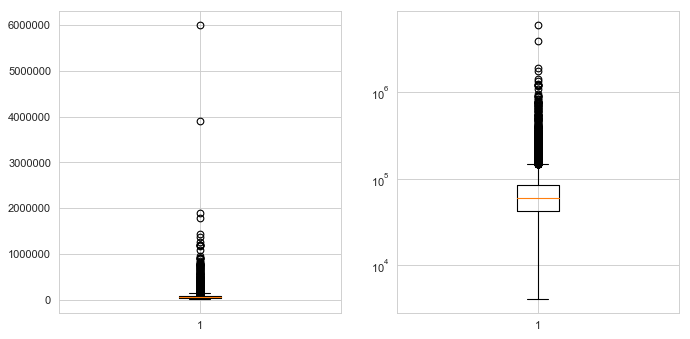

In [268]:
# Box Plots of annual income to check for outliers
sns.set_style("whitegrid")
plt.figure(figsize=(10,5),dpi=80)

# Sub-plot 1
plt.subplot(1,2,1)
plt.boxplot(df.annual_inc)

# Sub-plot 2
plt.subplot(1,2,2)
plt.boxplot(df.annual_inc)
plt.yscale('log')

plt.show()

We observe the precense of outliers in the annual income attribute. However, we prefer not to remove these outliers as there is every possibility that some of the borrowers could have high annual income than the rest of the lot. Moreover, we are not performing any aggregation on the annual income.

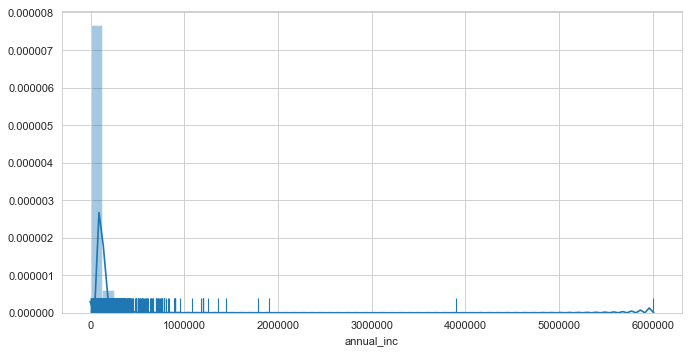

In [269]:
# Let's check for the annual salary distribution. 
exp_bins = [0, 3, 7, 10]
plt.figure(figsize=(10,5),dpi=80)
sns.distplot(df['annual_inc'], rug=True)
plt.show()

We can see that the majority of the borrowers lie within 100000 annual income range.

In [270]:
# Let's bucket the annual income into low, medium & high income. Below are the ranges defined for different categories
# 0 to 50000 - low_income
# 50000 to 100000 - medium_income
# 100000 to 6000000 - high income
salary_bins = [0, 50000, 100000, 6000000]
salary_group_names = ['low_income', 'medium_income', 'high_income']
df['salary_bucket'] = pd.cut(df['annual_inc'], salary_bins, labels = salary_group_names)
df.loc[:,['annual_inc','salary_bucket']].head()

,annual_inc,salary_bucket
0,24000.0,low_income
1,30000.0,low_income
2,12252.0,low_income
3,49200.0,low_income
4,80000.0,medium_income


In [271]:
# Let's determine the percentage of defaulters in each income category
group_by_salary = df.groupby('salary_bucket')
risk_salary = group_by_salary.loan_risk.agg(np.mean)
round(risk_salary*100,2)

salary_bucket
low_income       16.23
medium_income    13.08
high_income      10.31
Name: loan_risk, dtype: float64

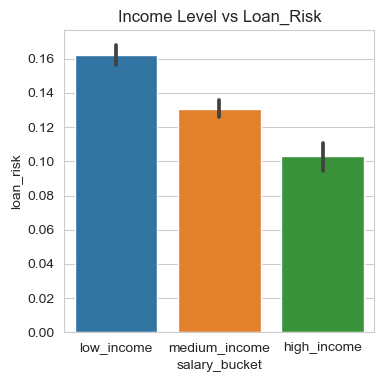

In [272]:
# Barchart comparing percentage of defaulters in each income category
plt.figure(figsize=(4,4),dpi=100)
sns.barplot(x='salary_bucket',y='loan_risk', data=df)
plt.title('Income Level vs Loan_Risk')
plt.show()

We can see that the low_income group has relatively highest defaulter rate at __16.23%__. So, we will consider this as one of our driving variable.

### - Funded Amount

In [273]:
# Summary statistics of loan amount
df.funded_amnt.describe(percentiles=[0.25,0.5,0.75,0.95,0.96,0.97,0.98,0.99,1])

count    37898.000000
mean     11046.757085
std       7206.575568
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
95%      25000.000000
96%      25000.000000
97%      28000.000000
98%      30000.000000
99%      35000.000000
100%     35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

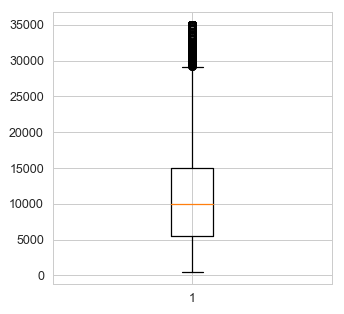

In [274]:
# Boxplot depicting the summary statistics of funded amount
plt.figure(figsize=(4,4),dpi=90)

plt.boxplot(df.funded_amnt)
plt.show()

We observe some outliers in funded amount but are not removed from the dataset. We are assuming that there is every possibility that borrowers are fuded with loans as high as 35000. Any defaulters in those outliers would lead to high risk to the lenders club and hence we are not excluding these outliers from our dataset. Moreover, we are performing any aggregates on the funded amount values. So, there wouldn't be any skewed observations in our analysis.

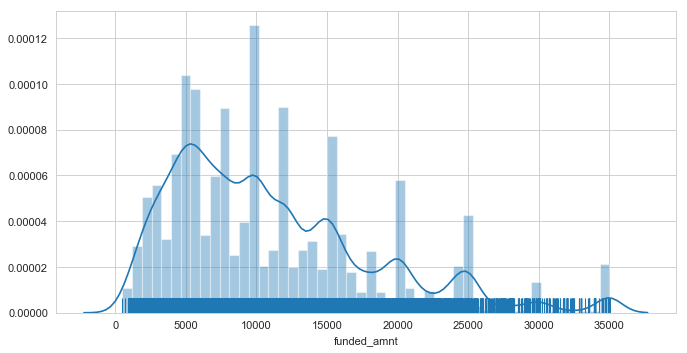

In [275]:
# Let's check for the funded amount distribution.
plt.figure(figsize=(10,5),dpi=80)
sns.distplot(df['funded_amnt'], rug=True)
plt.show()

In [276]:
# Let's bucket the funded amount into low, medium & big loan. Below are the ranges assumed for different categories
# 0 to 5000 - small_loan
# 5000 to 15000 - medium_loan
# 15000 to 35000 - big_loan
fund_bins = [0, 5000, 15000, 35000]
fund_group_names = ['small_loan', 'medium_loan', 'big_loan']
df['fund_bucket'] = pd.cut(df['funded_amnt'], fund_bins, labels = fund_group_names)
df.loc[:,['funded_amnt','fund_bucket']].head()

,funded_amnt,fund_bucket
0,5000,small_loan
1,2500,small_loan
2,2400,small_loan
3,10000,medium_loan
4,3000,small_loan


In [277]:
# Let's determine the percentage of defaulters in each fund category created
group_by_fund_amt = df.groupby('fund_bucket')
risk_fund_amnt = group_by_fund_amt.loan_risk.agg(np.mean)
round(risk_fund_amnt*100,2)

fund_bucket
small_loan     13.35
medium_loan    12.69
big_loan       17.39
Name: loan_risk, dtype: float64

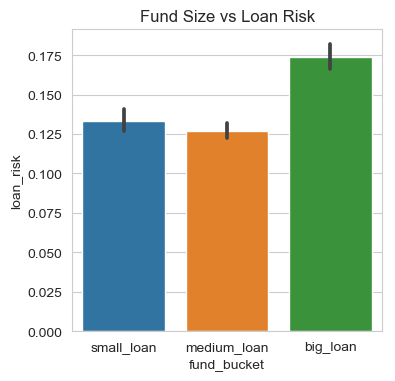

In [278]:
# Barchart comparing percentage of defaulters in each fund category created
plt.figure(figsize=(4,4),dpi=100)
sns.barplot(x='fund_bucket',y='loan_risk', data=df)
plt.title('Fund Size vs Loan Risk')
plt.show()

We can see that big_loans are having high default rates among the lot with around __17.39%__. So, we will be considering this as one our driving variable.

### - Interest Rate

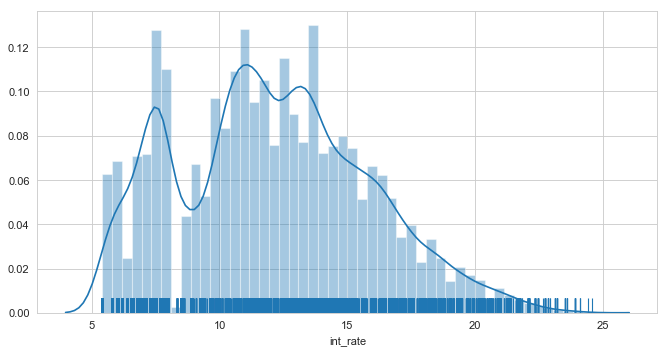

In [279]:
# Let's check for the Interest rate distribution.
plt.figure(figsize=(10,5),dpi=80)
sns.distplot(df['int_rate'].apply(lambda x: float(x)), rug=True)
plt.show()

We can see that the majority of interest rates lie between 10 to 20.

In [280]:
# Let's bucket the interest rates into low, medium & big interest. Below are the ranges assumed for different categories
# 0 to 10- low_interest
# 10 to 16 - medium_interest
# 16 to 25 - high_interest
int_bins = [0, 10, 16, 25]
int_group_names = ['low_interest', 'medium_interest', 'high_interest']
df['int_bucket'] = pd.cut(df['int_rate'].apply(lambda x: float(x)), int_bins, labels = int_group_names)
df.loc[:,['int_rate','int_bucket']].head()

,int_rate,int_bucket
0,10.65,medium_interest
1,15.27,medium_interest
2,15.96,medium_interest
3,13.49,medium_interest
4,12.69,medium_interest


In [281]:
# Let's determine the percentage of defaulters in each interest category created
group_by_interest = df.groupby('int_bucket')
risk_int = group_by_interest.loan_risk.agg(np.mean)
round(risk_int*100,2)

int_bucket
low_interest        6.34
medium_interest    14.69
high_interest      26.38
Name: loan_risk, dtype: float64

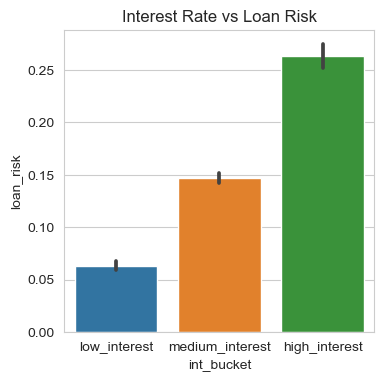

In [282]:
# Barchart comparing percentage of defaulters in each fund category created
plt.figure(figsize=(4,4),dpi=100)
sns.barplot(x='int_bucket',y='loan_risk', data=df)
plt.title('Interest Rate vs Loan Risk')
plt.show()

We can observe that the borrowers who are allocated high_interest experience relatively high default rates around __26.38%__. So, this would be one of our driving variable.

### - Employee Experience

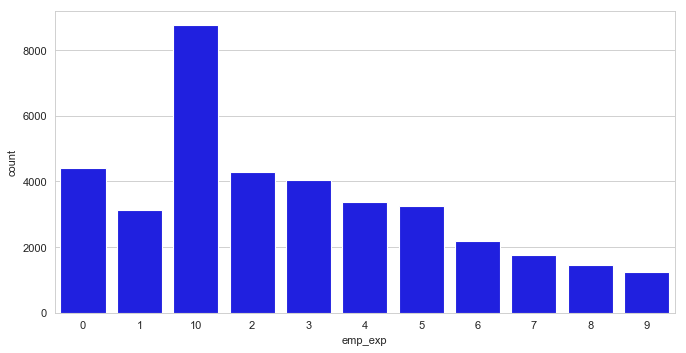

In [283]:
# Let's check for the level of experience spread across population.
plt.figure(figsize=(10,5),dpi=80)
sns.countplot(x='emp_exp', color = 'blue', data=df)
plt.show()

In [284]:
# Let's bucket the experience of the employees into different categories such as junior, intermediate & senior into a column exp_bucket
# Experience is bucketed as follows:
# 0 to 4 - Junior
# 4 to 8 - Intermediate
# 8 to 10 - Senior
exp_bins = [0, 3, 7, 10]
exp_group_names = ['junior', 'intermediate', 'senior']
df['exp_bucket'] = pd.cut(df['emp_exp'].apply(lambda x: int(x)), exp_bins, labels = exp_group_names)
df.loc[df.exp_bucket.isnull(), 'exp_bucket'] = 'junior'
df.loc[:, ['emp_exp','exp_bucket']].head()

,emp_exp,exp_bucket
0,10,senior
1,0,junior
2,10,senior
3,10,senior
4,1,junior


In [285]:
# Let's determine the percentage of defaulters in each experience category created
group_by_exp = df.groupby('exp_bucket')
risk_exp = group_by_exp.loan_risk.agg(np.mean)
round(risk_exp*100,2)

exp_bucket
junior          13.55
intermediate    13.79
senior          14.47
Name: loan_risk, dtype: float64

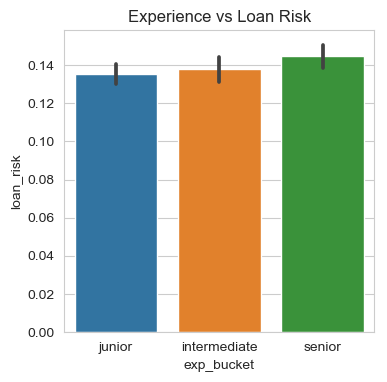

In [286]:
# Barchart comparing percentage of defaulters in each experience category created
plt.figure(figsize=(4,4),dpi=100)
sns.barplot(x='exp_bucket',y='loan_risk', data=df)
plt.title('Experience vs Loan Risk')
plt.show()

We can observe the the default rates are almost the same in each of the experience category. So, we will __NOT__ be considering this as a driving variable.

### - Grades

In [287]:
# Let's check the count value of each grade
df['grade'].value_counts()

B    11476
A     9553
C     7731
D     5068
E     2749
F     1010
G      311
Name: grade, dtype: int64

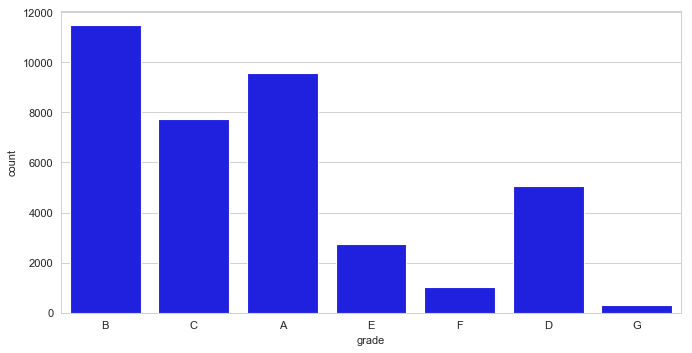

In [288]:
# Let's check for the grades spread across the population
plt.figure(figsize=(10,5),dpi=80)
sns.countplot(x='grade', color = 'blue', data=df)
plt.show()

In [289]:
# Let's determine the percentage of defaulters in each grade category
group_by_grade = df.groupby('grade')
risk_grade = group_by_grade.loan_risk.agg(np.mean)
round(risk_grade*100,2)

grade
A     5.78
B    11.55
C    16.18
D    20.70
E    24.95
F    30.10
G    31.51
Name: loan_risk, dtype: float64

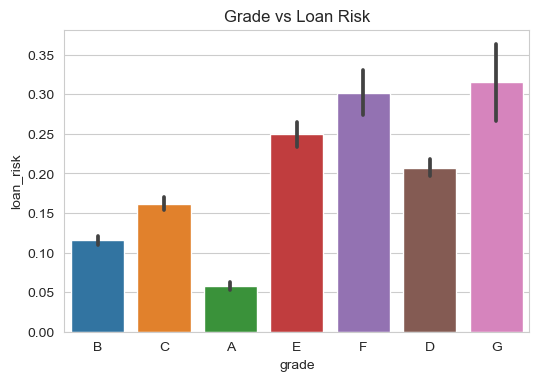

In [290]:
# Barchart comparing percentage of defaulters in each grade category
plt.figure(figsize=(6,4),dpi=100)
sns.barplot(x='grade',y='loan_risk', data=df)
plt.title('Grade vs Loan Risk')
plt.show()

We can observe that grades E, F, D & G have relatively high default rate in the lot. We will not be considering this as a driving variable as we are not aware of the encoding behind the grades and also, we have more important variables that this.

### - Home Ownership

In [291]:
# Let's check for the count for each category in home ownership
df['home_ownership'].value_counts()

RENT        18077
MORTGAGE    16951
OWN          2774
OTHER          96
Name: home_ownership, dtype: int64

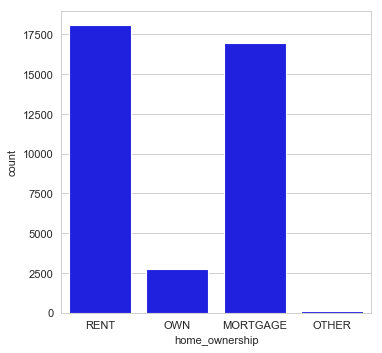

In [292]:
# Let's check for the home ownership count across the dataset
plt.figure(figsize=(5,5),dpi=80)
sns.countplot(x='home_ownership', color = 'blue', data=df)
plt.show()

In [293]:
# Let's determine the percentage of defaulters in each home ownership category
group_by_owner = df.groupby('home_ownership')
risk_home = group_by_owner.loan_risk.agg(np.mean)
round(risk_home*100,2)

home_ownership
MORTGAGE    12.95
OTHER       18.75
OWN         13.88
RENT        14.75
Name: loan_risk, dtype: float64

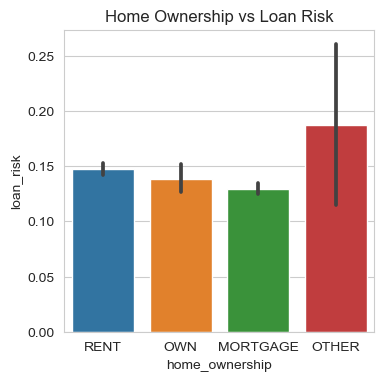

In [294]:
# Barchart comparing percentage of defaulters in each home ownership category
plt.figure(figsize=(4,4),dpi=100)
sns.barplot(x='home_ownership',y='loan_risk', data=df)
plt.title('Home Ownership vs Loan Risk')
plt.show()

We observe that __"OTHER"__ has relatively high defaut rate. Though, we see high default rate in one category of home ownership, we are not considering this as a strong driving varible.

### - Credit Utilization

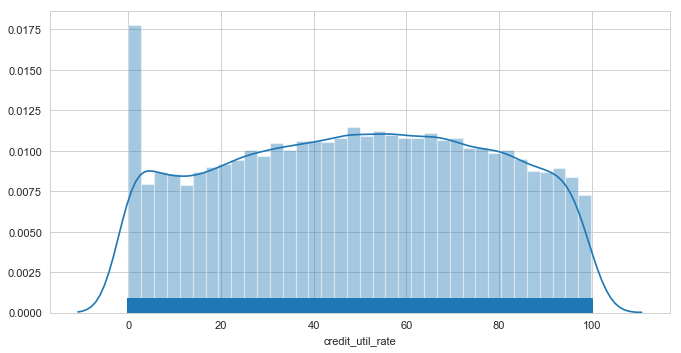

In [295]:
# Let's check for the Credit utilization rate distribution.
plt.figure(figsize=(10,5),dpi=80)
sns.distplot(df['credit_util_rate'].apply(lambda x: float(x)), rug=True)
plt.show()

According to the research we carried out on the credit utlization rate it is said that, a good credit utlization rate should be <30. So, we have buketed this attribute accordingly in the below step.

In [296]:
# Let's bucket the credit utilization of the borrowers into different categories such as good_util, over_utli in column credit_bucket
# Credit utilization is bucketed as follows:
# <= 30 - good_util
# > 30 - over_util
credit_bins = [0, 30, 100]
credit_group_names = ['good_util', 'over_util']
df['credit_bucket'] = pd.cut(df['credit_util_rate'].apply(lambda x: float(x)), credit_bins, labels = credit_group_names)
df.loc[df.credit_bucket.isnull(), 'credit_bucket'] = 'good_util'
df.loc[:,['credit_util_rate','credit_bucket']].head()

,credit_util_rate,credit_bucket
0,83.70,over_util
1,9.40,good_util
2,98.50,over_util
3,21,good_util
4,53.90,over_util


In [297]:
# Let's determine the percentage of defaulters in each credit utilization category
group_by_credit = df.groupby('credit_bucket')
risk_credit = group_by_credit.loan_risk.agg(np.mean)
round(risk_credit*100,2)

credit_bucket
good_util     9.89
over_util    15.54
Name: loan_risk, dtype: float64

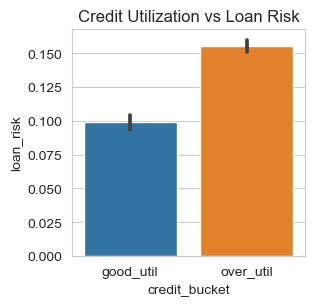

In [298]:
# Barchart comparing percentage of defaulters in each credit utilization category
plt.figure(figsize=(3,3),dpi=100)
sns.barplot(x='credit_bucket',y='loan_risk', data=df)
plt.title('Credit Utilization vs Loan Risk')
plt.show()

We can observe that the default rate is high in those borrowers which have high credit utilization around __15.54%__. So, we will be considering this as one of our driving variable.

### - Debt to income ratio (dti)

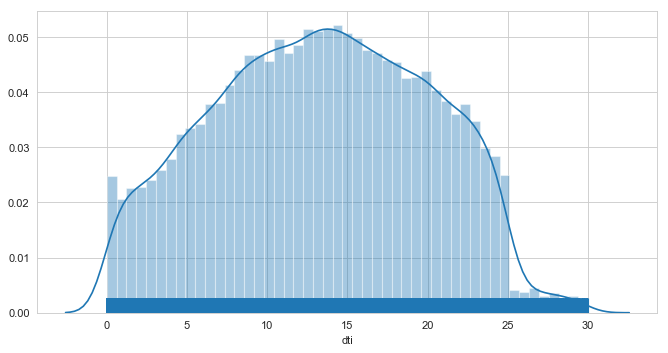

In [299]:
# Let's check for the Debt to income ratio distribution
plt.figure(figsize=(10,5),dpi=80)
sns.distplot(df['dti'], rug=True)
plt.show()

It is observed that the dti ration varies from 0 to 30. We have bucketed the dti ratios in the below step to analyse the default rates.

In [300]:
# Let's bucket the dti ratio of the borrowers into different categories such as low_dti, medium_dti, high_dti in column dti_bucket
# DTI is bucketed as follows:
# 0 to 10 - low_dti
# 10 to 20 - medium_dti
# 20 to 30 - high_dti
dti_bins = [0, 10, 20, 30]
dti_group_names = ['low_dti', 'medium_dti', 'high_dti']
df['dti_bucket'] = pd.cut(df['dti'], dti_bins, labels = dti_group_names)
df.loc[df.dti_bucket.isnull(), 'dti_bucket'] = 'low_dti'
df.loc[:,['dti','dti_bucket']].head()

,dti,dti_bucket
0,27.65,high_dti
1,1.00,low_dti
2,8.72,low_dti
3,20.00,medium_dti
4,17.94,medium_dti


In [301]:
# Let's determine the percentage of defaulters in each dti category created
group_by_dti = df.groupby('dti_bucket')
risk_dti = group_by_dti.loan_risk.agg(np.mean)
round(risk_dti*100,2)

dti_bucket
low_dti       12.12
medium_dti    14.41
high_dti      15.65
Name: loan_risk, dtype: float64

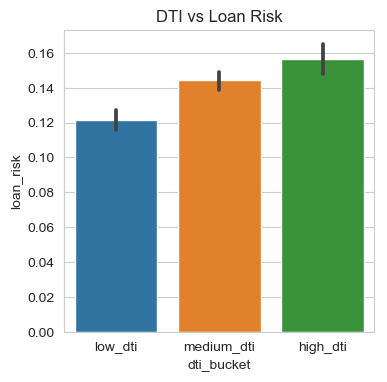

In [302]:
# Barchart comparing percentage of defaulters in each dti category created
plt.figure(figsize=(4,4),dpi=100)
sns.barplot(x='dti_bucket',y='loan_risk', data=df)
plt.title('DTI vs Loan Risk')
plt.show()

It is observed that high dti borrowers have a relatively high default rate of around __15.65%__. DTI is an importand attribute while assessing a loan application. Thus, this would be one of our driving variable.

### - Purpose

In [303]:
# Let's check for the count of each category in purpose
df['purpose'].value_counts()

debt_consolidation    17940
credit_card            4900
other                  3715
home_improvement       2828
major_purchase         2090
small_business         1729
car                    1478
wedding                 914
medical                 657
moving                  548
house                   363
vacation                345
educational             296
renewable_energy         95
Name: purpose, dtype: int64

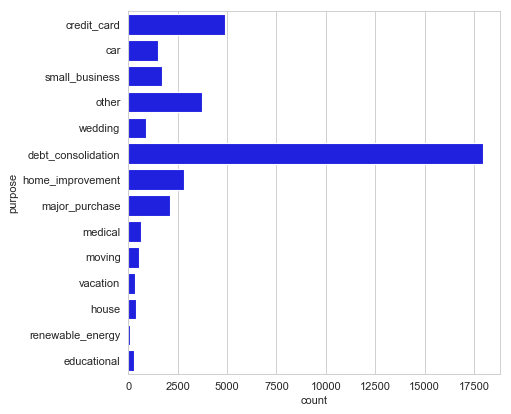

In [304]:
# Let's check for the purpose category count across the dataset
plt.figure(figsize=(6,6),dpi=80)
sns.countplot(y='purpose', color = 'blue',data=df)
plt.show()

In [305]:
# Let's determine the percentage of defaulters in each category of purpose
group_by_purpose = df.groupby('purpose')
risk_purpose = group_by_purpose.loan_risk.agg(np.mean)
round(risk_purpose*100,2)

purpose
car                   10.22
credit_card           10.22
debt_consolidation    14.62
educational           16.55
home_improvement      11.28
house                 15.98
major_purchase         9.86
medical               15.07
moving                14.78
other                 15.56
renewable_energy      18.95
small_business        25.68
vacation              14.49
wedding                9.74
Name: loan_risk, dtype: float64

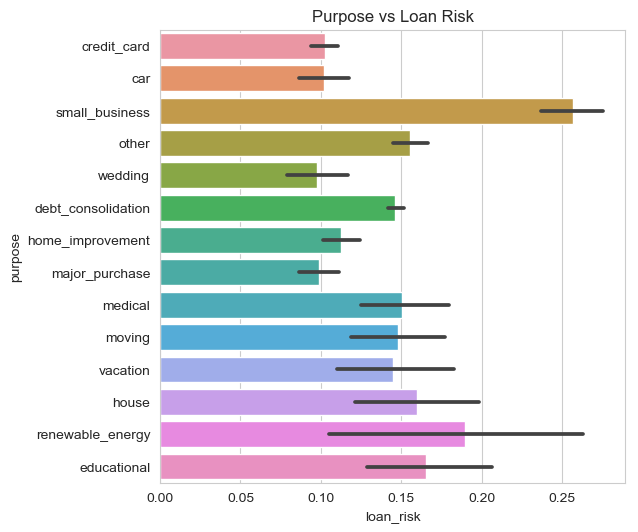

In [306]:
# Barchart depicting percentage of defaulters in each category of purpose
plt.figure(figsize=(6,6),dpi=100)
sns.barplot(x='loan_risk',y='purpose', data=df)
plt.title('Purpose vs Loan Risk')
plt.show()

Though small businees have the highest default rates among the lot, we are not considering this as the strong driving varaible as we believe it's not very representative of the borrower.

### - Verification Status

In [307]:
# Let's check the value count for each category of verification status
df['verification_status'].value_counts()

Not Verified       15774
Verified           12344
Source Verified     9780
Name: verification_status, dtype: int64

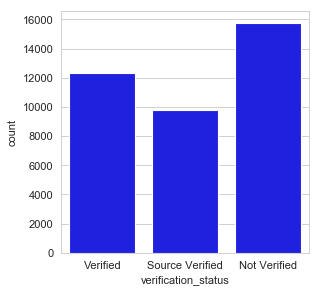

In [308]:
# Let's check for the verification status category count across the dataset
plt.figure(figsize=(4,4),dpi=80)
sns.countplot(x='verification_status', color = 'blue',data=df)
plt.show()

In [309]:
# # Let's determine the percentage of defaulters in each category of verification status
group_by_verf = df.groupby('verification_status')
risk_verf = group_by_verf.loan_risk.agg(np.mean)
round(risk_verf*100,2)

verification_status
Not Verified       12.20
Source Verified    14.24
Verified           15.79
Name: loan_risk, dtype: float64

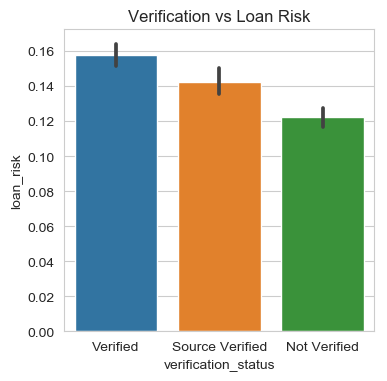

In [310]:
# Barchart depicting percentage of defaulters in each category of verification status.
plt.figure(figsize=(4,4),dpi=100)
sns.barplot(x='verification_status',y='loan_risk', data=df)
plt.title('Verification vs Loan Risk')
plt.show()

It is interesting to observe that the verified loans are having high default rates (around __15.8%__) than the non-verified loans. We will be considering this as our driving variable. 

### - Open Credit Lines

In [311]:
# Let's check the value counts for each open credit line
df['open_acc'].value_counts()

7     3857
8     3770
6     3767
9     3567
10    3093
5     3005
11    2641
4     2203
12    2200
13    1827
14    1422
3     1386
15    1132
16     910
17     704
2      524
18     517
19     385
20     277
21     233
22     134
23      92
24      73
25      54
26      29
28      24
27      21
30      14
29      13
34       5
31       5
33       3
32       3
35       3
36       2
38       1
39       1
44       1
Name: open_acc, dtype: int64

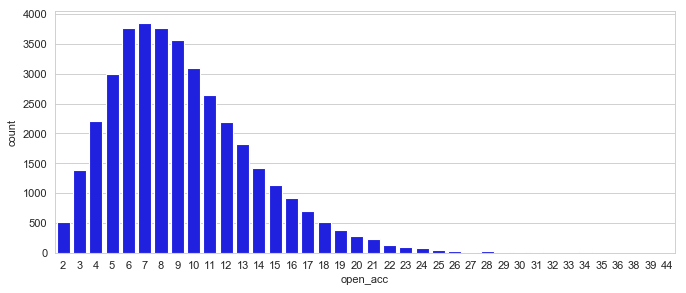

In [312]:
# Let's check for the open credit lines count across the dataset
plt.figure(figsize=(10,4),dpi=80)
sns.countplot(x='open_acc', color = 'blue',data=df)
plt.show()

According to the internet research, it is recommended to have a minimum of 4 credit lines for loan approvals. So, let's bucket this attribute to aid our further analysis.

In [313]:
# Let's bucket the open credit line of the borrowers into different categories such as less, medium & high credit lines in column open_credit_bucket
# Credit lines are bucketed as follows:
# 0 to 3 - less_credit_lines
# 3 to 20 - medium_credit_lines
# 20 to 30 - high_credit_lines
open_bins = [0, 3, 10, 44]
open_group_names = ['less_credit_lines', 'medium_credit_lines', 'high_credit_lines']
df['open_credit_bucket'] = pd.cut(df['open_acc'], open_bins, labels = open_group_names)
df.loc[:,['open_acc','open_credit_bucket']].head()

,open_acc,open_credit_bucket
0,3,less_credit_lines
1,3,less_credit_lines
2,2,less_credit_lines
3,10,medium_credit_lines
4,15,high_credit_lines


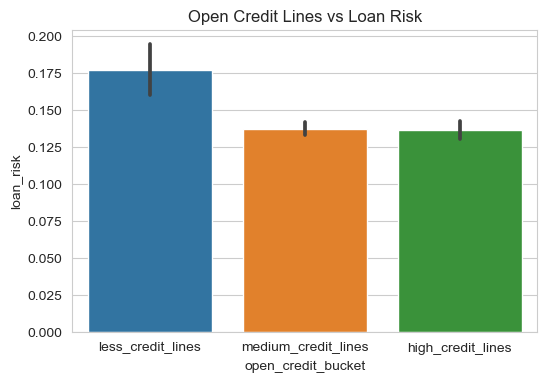

In [314]:
# Barchart depicting percentage of defaulters in each category of open credit lines.
plt.figure(figsize=(6,4),dpi=100)
sns.barplot(x='open_credit_bucket',y='loan_risk', data=df)
plt.title('Open Credit Lines vs Loan Risk')
plt.show()

It is observed that the borrowers with less credit lines have high default rate among the lot.

## Bivariate Analysis

In [315]:
# Let's create a pivot table of two driving variables verification status & DTI.
df.groupby('verification_status')
round((df.pivot_table(values = ['loan_risk'],index = 'verification_status', columns='dti_bucket',aggfunc='mean'))*100,1)

loan_risk                    
dti_bucket            low_dti medium_dti high_dti
verification_status                              
Not Verified             10.2       12.9     14.1
Source Verified          13.8       14.3     15.0
Verified                 13.4       16.4     17.5

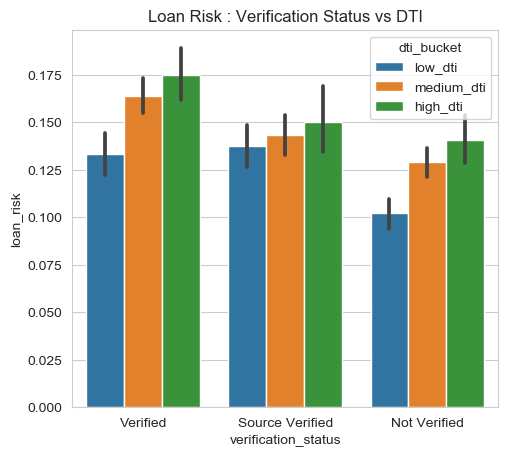

In [316]:
# Let's plot a barchart to carry out bivariate analysis of verification process & DTI
plt.figure(figsize=(5.5,5),dpi=100)
sns.barplot(x='verification_status',y='loan_risk', hue='dti_bucket',data=df)
plt.title('Loan Risk : Verification Status vs DTI')
plt.show()

Off the verification status, __verified__ has the highest loan defaulters (__15.8%__, from segmented univariate analysis) followed by __Souce Verified__ (__14.2%__). From  the above plot, it is interesting to note that most of the verified loans with high_dti & medium_dti are defaulting (__17.5% & 16.4%__). A same trend is observed in 'source verified' and 'not verified' loans.

__Recommendation to LC:__ It is recommended that LC regulate their loans to those borrowers having high and medium dti irrespective of whether a loan is verified or not to reduce the risk of default.

In [317]:
# Let's create a pivot table of two driving variables salary bucket & interest bucket.
df.groupby('salary_bucket')
round((df.pivot_table(values = ['loan_risk'],index = 'salary_bucket', columns='int_bucket',aggfunc='mean'))*100,1)

loan_risk                              
int_bucket    low_interest medium_interest high_interest
salary_bucket                                           
low_income             8.7            17.5          30.3
medium_income          5.2            13.7          26.3
high_income            3.6             9.6          20.9

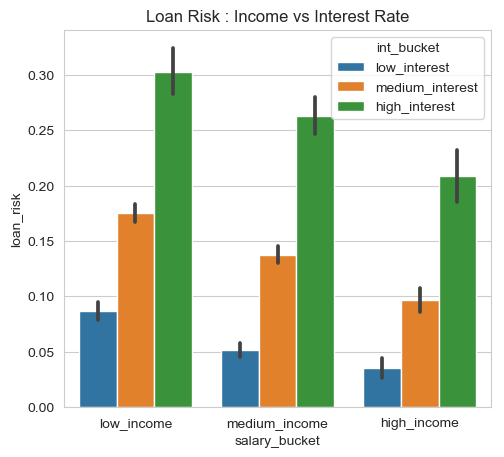

In [318]:
# Let's plot a barchart to carry out bivariate analysis of salary bucket & interest bucket
plt.figure(figsize=(5.5,5),dpi=100)
sns.barplot(x='salary_bucket',y='loan_risk', hue='int_bucket',data=df)
plt.title('Loan Risk : Income vs Interest Rate')
plt.show()

From the combination of each of the salary bucket categories with high interest rates, the default rates are high in comparision to medium and low interest rates.

Low_income & High interest - 30.3%

Medium_income & High_interest - 26.3%

High_income & High_interest - 20.9%

__Recommendation to LC__: We would recommend LC that there is a high possibility of defaulting a high interest loan among any given salary bucket. So, LC should review their higher interest rates to reduce the number of defaulters.

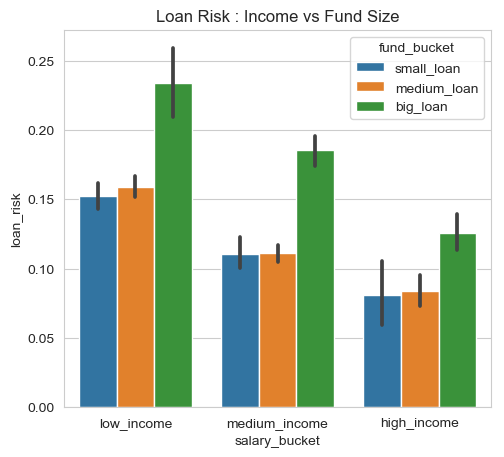

In [321]:
# Let's plot a barchart to carry out bivariate analysis of salary bucket & loan bucket.
plt.figure(figsize=(5.5,5),dpi=100)
sns.barplot(x='salary_bucket',y='loan_risk', hue='fund_bucket',data=df)
plt.title('Loan Risk : Income vs Fund Size')
plt.show()

We can observe that the low income group which is funded with big loans is having high default rates (__23.4%__).
A similar observation can be made for medium income & big loans with a defaut rate of __18.5%__.

__Recommendation to LC:__ We would recommend LC not to fund big loans for low_income & middle income groups.

In [322]:
# Let's create a pivot table of two driving variables credit bucket & verification status.
df.groupby('credit_bucket')
round((df.pivot_table(values = ['loan_risk'],index = 'credit_bucket', columns='verification_status',aggfunc='mean'))*100,1)

loan_risk                         
verification_status Not Verified Source Verified Verified
credit_bucket                                            
good_util                    8.4             9.8     12.3
over_util                   14.0            16.1     17.0

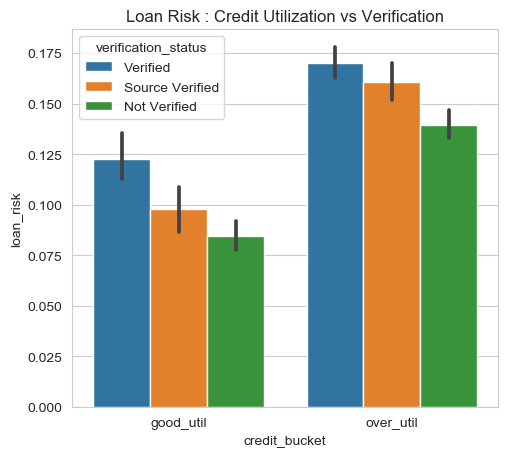

In [323]:
# Let's plot a barchart to carry out bivariate analysis of credit bucket & verification status
plt.figure(figsize=(5.5,5),dpi=100)
sns.barplot(x='credit_bucket',y='loan_risk', hue='verification_status',data=df)
plt.title('Loan Risk : Credit Utilization vs Verification')
plt.show()

It is observed that irrespective of the verification status, borrowers with high credit utilization are defaulting the most.

Verified & Over_util - 17.0%

Source Verified & Over_util - 16.1%

Not Verified & Over_util - 14.0%

__Recommendation to LC__: We would recommend LC __NOT__ to give loans to borrowers with high credit utilization whether a loan is verified or not.

In [324]:
# Let's create a pivot table of two driving variables open_credit_bucket & credit_bucket.
df.groupby('credit_bucket')
round((df.pivot_table(values = ['loan_risk'],index = 'credit_bucket', columns='open_credit_bucket',aggfunc='mean'))*100,1)

loan_risk                                      
open_credit_bucket less_credit_lines medium_credit_lines high_credit_lines
credit_bucket                                                             
good_util                       17.1                 9.5               9.3
over_util                       18.0                15.3              15.6

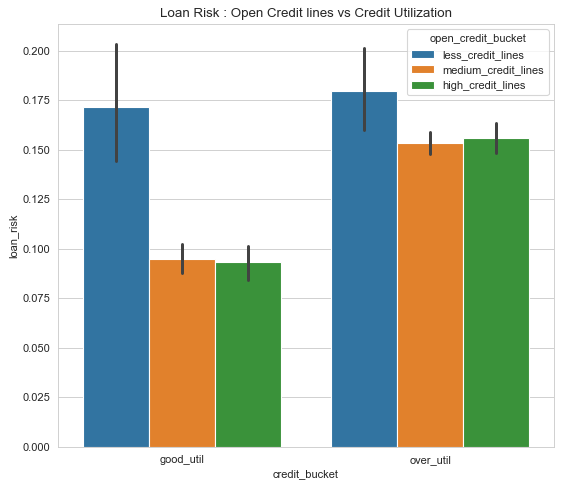

In [325]:
# Let's plot a barchart to carry out bivariate analysis of open_credit_bucket & credit_bucket.
plt.figure(figsize=(8,7),dpi=80)
sns.barplot(x='credit_bucket',y='loan_risk', hue='open_credit_bucket',data=df)
plt.title('Loan Risk : Open Credit lines vs Credit Utilization')
plt.show()

The following default cases are observed:

Good_util & less_credit line - 17.1% 

Over_util & less_credit line - 18.0%

Over_util & medium_credit line - 15.7%

Over_util & high_credit line - 15.2%

__Recommendation to LC__: 
- Though the borrower is having good credit utilization(<30%), we recommend __NOT__ to give loans if the open credit line are less.
- We also recommend __NOT__ to give loans to those borrowers who have high credit utilization irrespective of the number of open credit line.